# **Bootcamp Ciencia de Datos e Inteligencia Artificial**
# **Módulo 5. Deep Learning**
## **Semana 18. Redes profundas alimentadas hacia adelante**

¡Hola! La semana pasada vimos los fundamentos de las redes neuronales, sus aplicaciones en la vida y la manera de comenzar en este mundo del *Deep Learning*. Ahora vamos más allá y comencemos a darle de comer a las neuronas, a las tuyas y a las que generes con código.

Revisa el contenido con especial atención, haz tu copia y comienza a practicar, pues de esa manera surgirán dudas que podrás resolver con tu *coach* el día de tu clase.

Bueno, comencemos a hacer MLP, es decir, perceptrón multicapa, que es una clase de red neuronal artificial totalmente conectada.

# Introducción a las redes *feedforward*

Los motores de búsqueda, la traducción automática y las aplicaciones móviles dependen de tecnologías de aprendizaje profundo. Funcionan estimulando el cerebro humano en términos de identificación y creación de patrones a partir de varios tipos de información.

Una red neuronal *feedforward* es un componente clave de esta tecnología, ya que ayuda a las personas que desarrollan software con el reconocimiento y la clasificación de patrones, la regresión no lineal y la aproximación de funciones.

Las redes neuronales *feedforward* son un tipo de red neuronal artificial en la que las conexiones de los nodos no forman un bucle. A menudo las *feedforward* son denominadas redes multicapa de neuronas porque toda la información fluye solo hacia adelante.

Los datos ingresan a los nodos de entrada, viajan a través de las capas ocultas y eventualmente salen de los nodos de salida. La red carece de enlaces que permitan que la información que sale del nodo de salida se envíe de vuelta a la red.

## Capas de una red neuronal *feedforward*

### De entrada (*input layer*)

Esta capa contiene las neuronas que reciben información. Los datos se pasan posteriormente al siguiente nivel. El número total de neuronas de la capa de entrada es igual al número de variables en el conjunto de datos.

### Oculta (*hidden layer*)

Esta es la capa intermedia, que está oculta entre las capas de entrada y salida. Tiene una gran cantidad de neuronas que realizan alteraciones en las entradas. Luego se comunican con la capa de salida.

### De salida (*output layer*)

Es la última capa y depende de la construcción del modelo. Además, la capa de salida es la característica esperada, ya que conoce el resultado deseado.

### Pesos de neuronas

Los pesos se utilizan para describir la fuerza de una conexión entre las neuronas. El rango del valor de un peso es de 0 a 1.

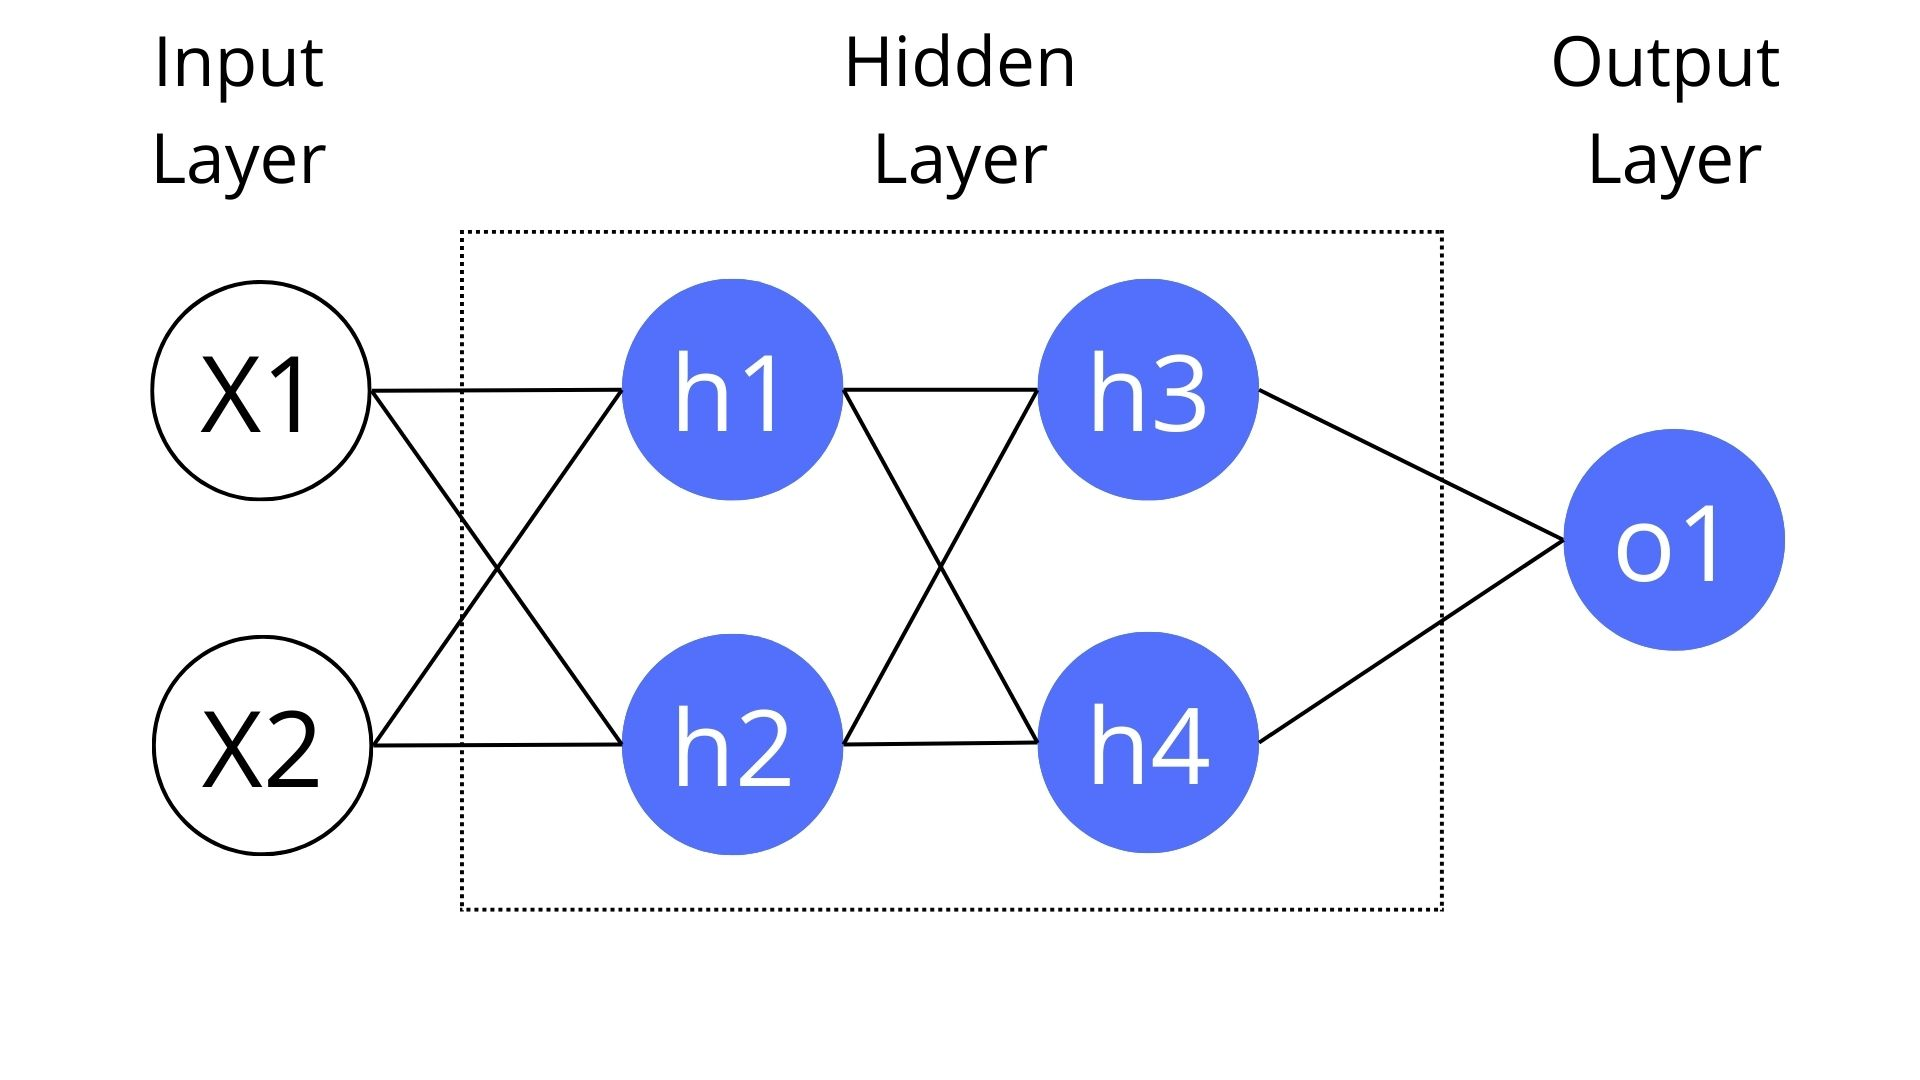

## Función de costo en la red neuronal *feedforward*

La función de costo es un factor importante de una red neuronal *feedforward*. En general, los ajustes menores a los pesos y sesgos tienen poco efecto en los puntos de datos categorizados. Por lo tanto, para determinar un método que mejore el desempeño se realizan ajustes menores a los pesos y sesgos utilizando una función de costo uniforme.

La función de costo del error cuadrático medio se define de la manera siguiente:

$$
C(w,b) ≡ \frac{1}{2n} \sum_{x}{∥Y(X)-a∥}^2
$$

Donde:
- *w*: pesos recolectados en la red
- *b*: sesgos
- *n*: número de entradas de entrenamiento
- *a*: vectores de salida
- *x*: entradas
- ||v||: longitud habitual del vector *v*

## Función de pérdida en la red neuronal *feedforward*

La función de pérdida de una red neuronal se utiliza para identificar si es necesario ajustar el proceso de aprendizaje.

Habrá tantas neuronas como clases haya en la capa de salida, esto para mostrar la diferencia entre las distribuciones de probabilidades previstas y reales.

La pérdida de entropía cruzada para la clasificación binaria es la siguiente:

$$
L(\theta) = \left\lbrace\begin{array}{c} -log(y') \hspace{3mm} si \hspace{2mm} y = 1 \atop
-log(1-y') \hspace{3mm} si \hspace{2mm} y = 0 \end{array}\right.
$$

La pérdida de entropía cruzada asociada con la categorización multiclase es la siguiente:
$$
L(\theta) = - \sum_{1=1}^{k} y_{i}log(y'_{i})
$$

### Entropía

La entropía se define como la aleatoriedad o la medición del desorden de la información que se procesa en *Machine Learning*. En otras palabras, la entropía es la métrica de aprendizaje automático que mide la imprevisibilidad o impureza en el sistema.

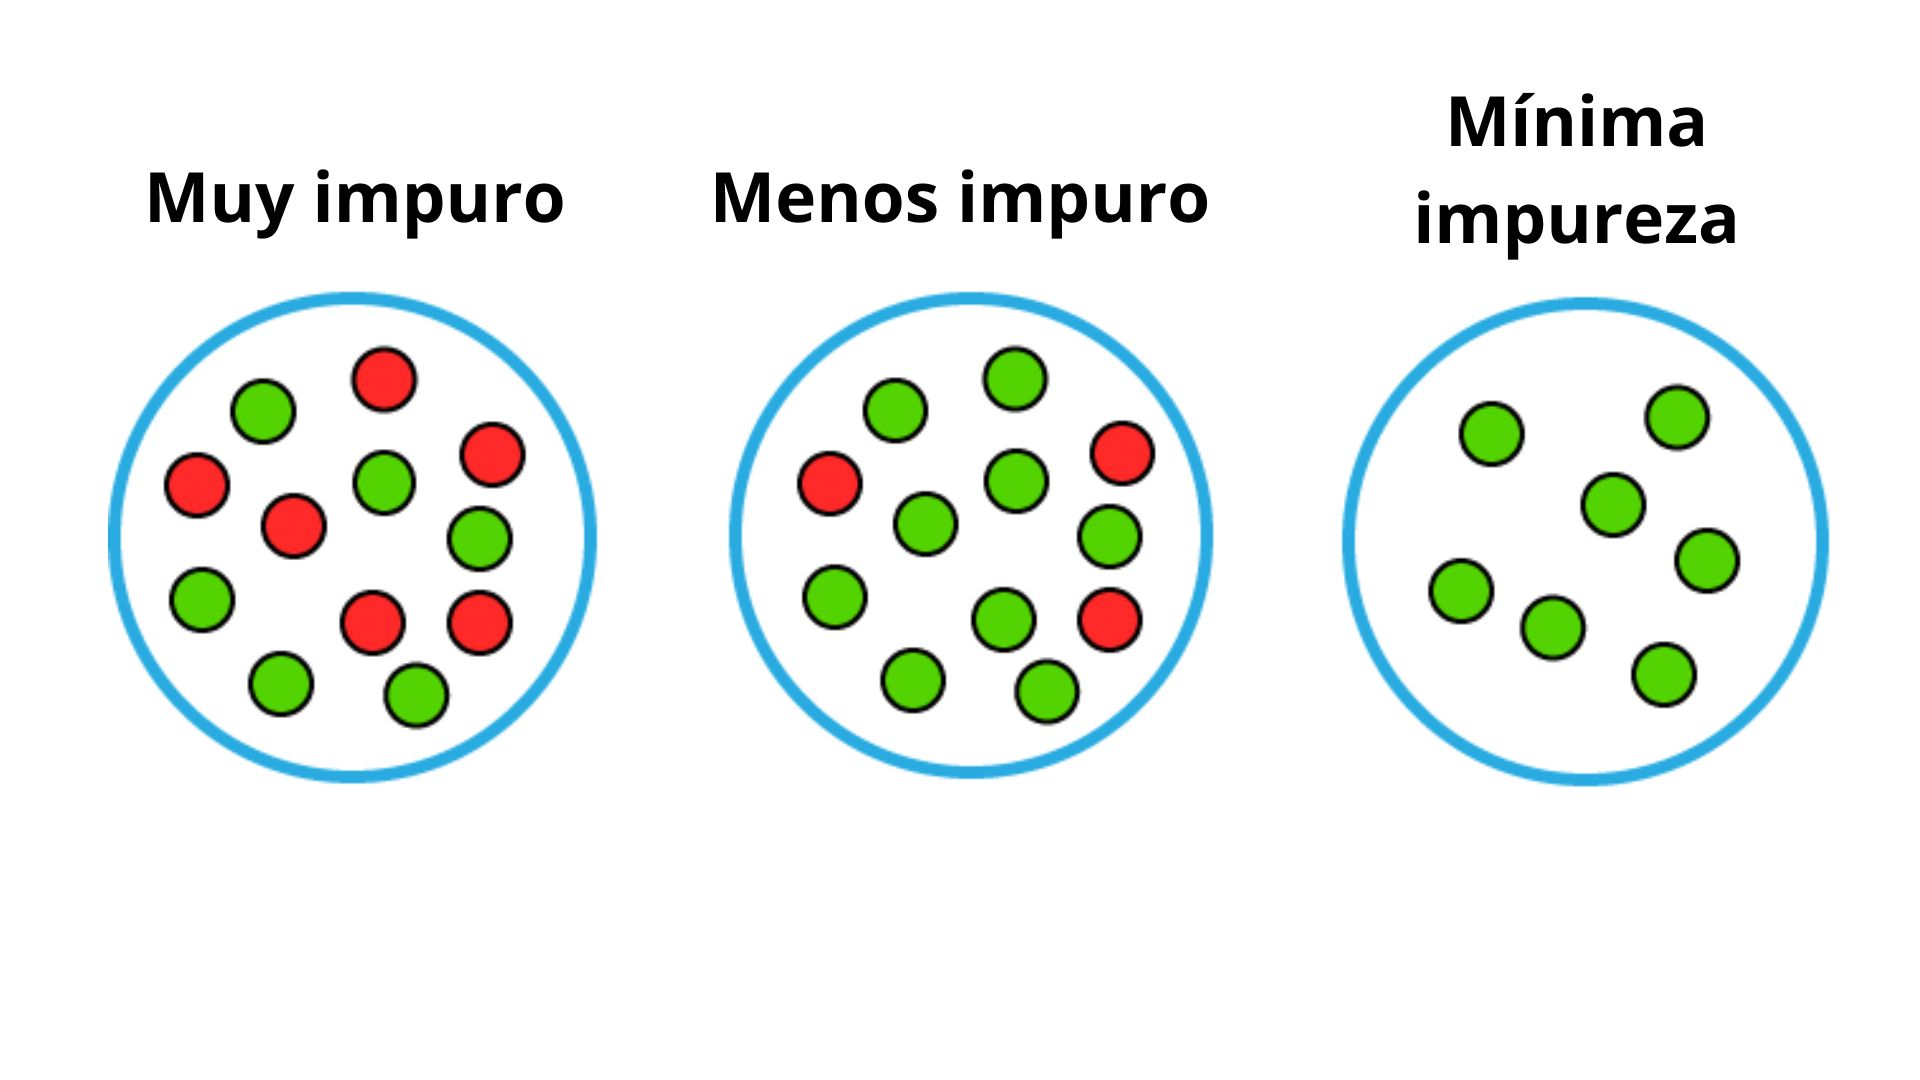

La entropía es la medida del desorden o las impurezas en la información procesada en el aprendizaje automático. Determina cómo un árbol de decisión elige dividir los datos.

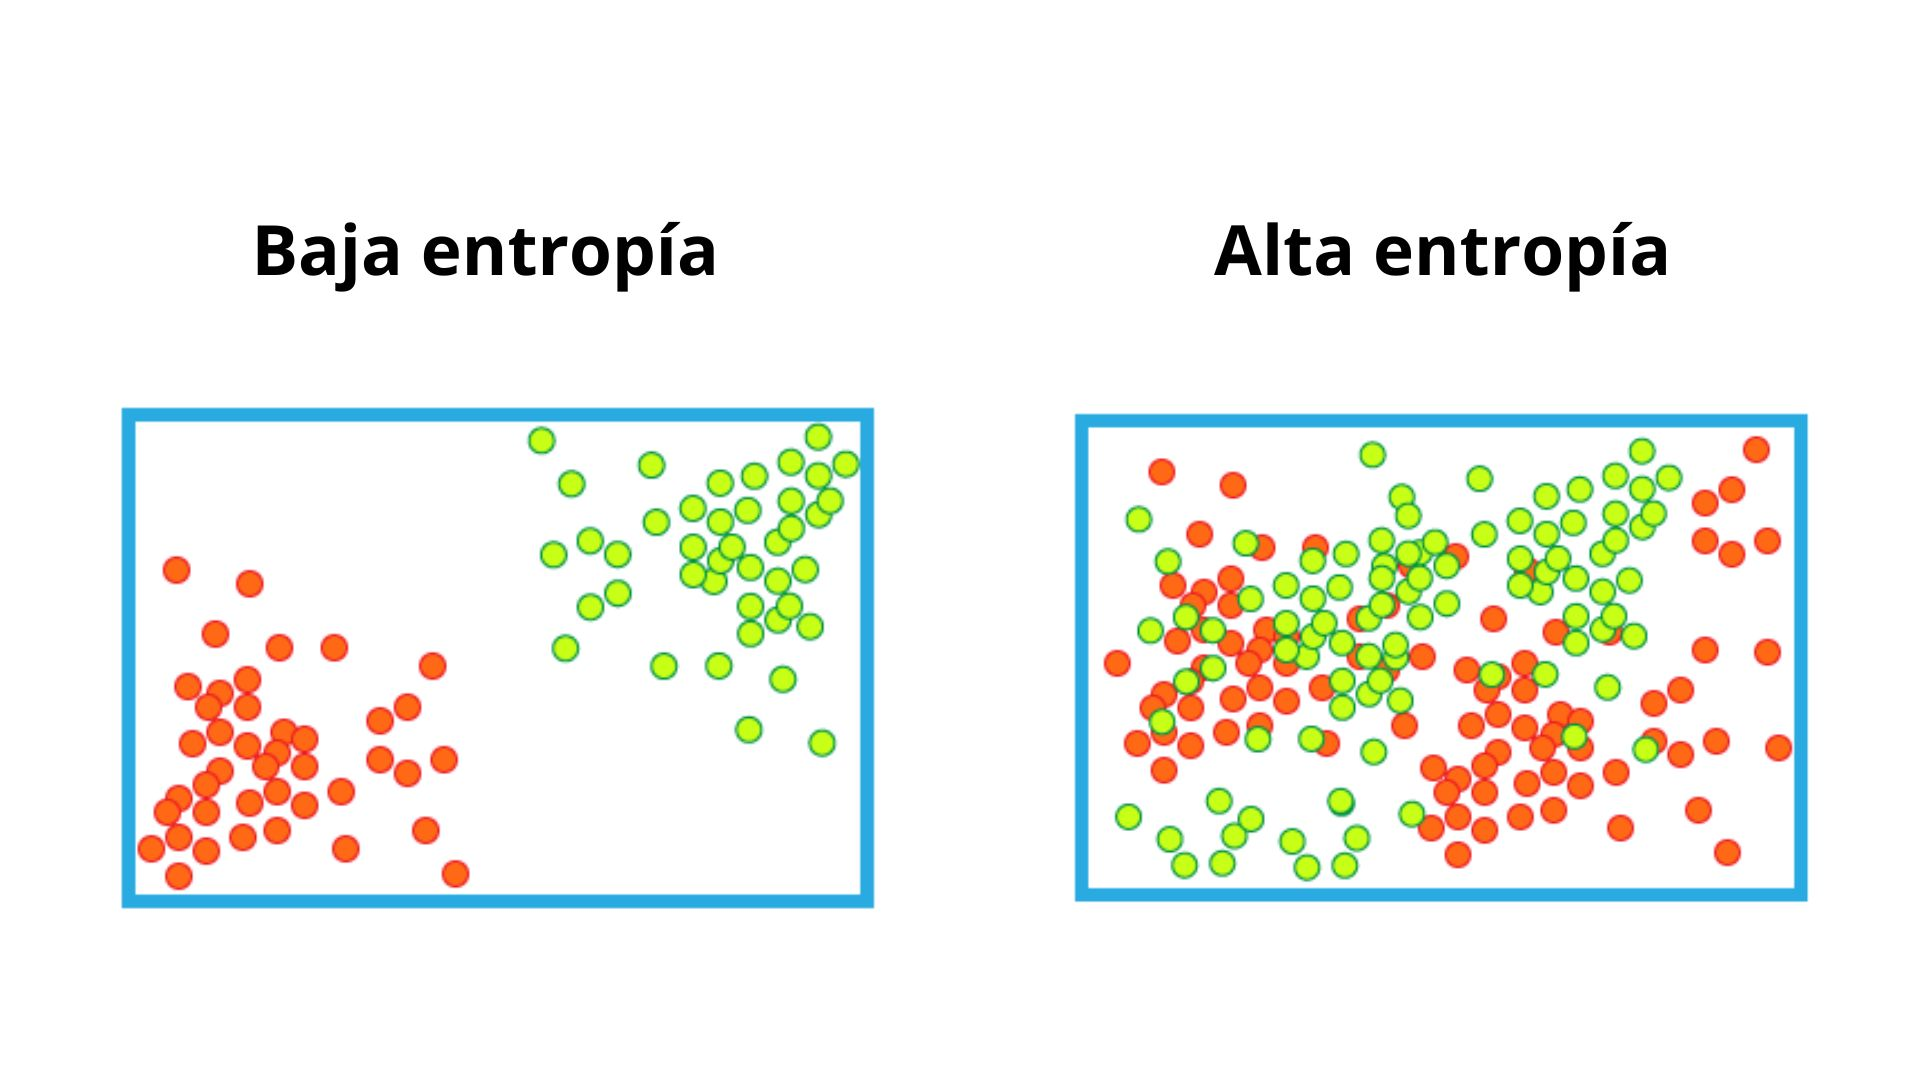

Por ejemplo, lanzar una moneda. Cuando la lanzamos puede haber dos resultados. Sin embargo, es difícil concluir cuál sería el resultado exacto al lanzar una moneda porque no existe una relación directa entre lanzar una moneda y sus resultados. Hay 50 % de probabilidad de ambos resultados; entonces, en tales escenarios, la entropía sería alta. Esta es la esencia de la entropía en el aprendizaje automático.

La entropia está dada por la fórmula:
$$
E = \sum_{i=1}^{N} P_{i} log_{2} P_{i}
$$

Donde $P_{i}$ es la probabilidad de seleccionar aleatoriamente un ejemplo de la clase $i$.

La entropía siempre se encuentra entre 0 y 1, sin embargo, dependiendo del número de clases en el conjunto de datos, puede ser mayor que 1.

Ya, suficiente de teoría. Vamos a la práctica.

# Programación de red neuronal *feedforward*

Ahora retomemos el primer ejemplo de la semana pasada para ampliarlo.

In [ ]:
import numpy as np

def sigmoide(x):
  # Definimos nuestra función de activación: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

# Creamos nuestra clase, que será nuestra red neuronal
class Neurona:
  def __init__(self, pesos, bias):
    self.pesos = pesos
    self.bias = bias

  def activacion(self, inputs):
    # Inputs de peso. Añadimos sesgo y usamos la función de activación
    total = np.dot(self.pesos, inputs) + self.bias
    return sigmoide(total)

pesos = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 4
n = Neurona(pesos, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.activacion(x))


0.9990889488055994


Combinamos nuestra neurona:

In [ ]:
import numpy as np

# Vamos a usar el código de la sección anterior, así que ejecútalo primero

class MiRedNeuronal:
  '''
  Una red neuronal con:
  - Dos inputs
  - Una capa oculta con dos neuronas (h1 y h2)
  - Una capa de salida con una neurona (o1)

  Cada neurona tiene los mismos pesos y sesgo:
  - w = [0, 1]
  - b = 0
  '''
  # Iniciamos nuestra clase
  def __init__(self):
    pesos = np.array([0, 1])
    bias = 0

    # Aquí usamos la clase "Neurona" de la sección anterior para generar nuestras capas y la salida
    self.h1 = Neurona(pesos, bias)
    self.h2 = Neurona(pesos, bias)
    self.o1 = Neurona(pesos, bias)

    # Alimentamos la red neuronal
  def alimentacion(self, x):
    out_h1 = self.h1.activacion(x)
    out_h2 = self.h2.activacion(x)

    # Las entradas para o1 son las salidas de h1 y h2
    out_o1 = self.o1.activacion(np.array([out_h1, out_h2]))

    return out_o1

network = MiRedNeuronal()
x = np.array([2, 3])
print(network.alimentacion(x))

0.7216325609518421


Ahora supongamos que tienes los siguientes datos:

| Nombre | Peso(libras)    | Altura(pulgadas) | Género |
|-------------------|-------------|---------------|--------------|
| Juan  | 160  | 70 | H |
| Alicia | 133 | 65 | M |
| Carlos | 152 | 72 | H |
| Mari  | 120 |60 | M |

Entrenemos nuestra red para predecir el género de alguien dado su peso y altura:

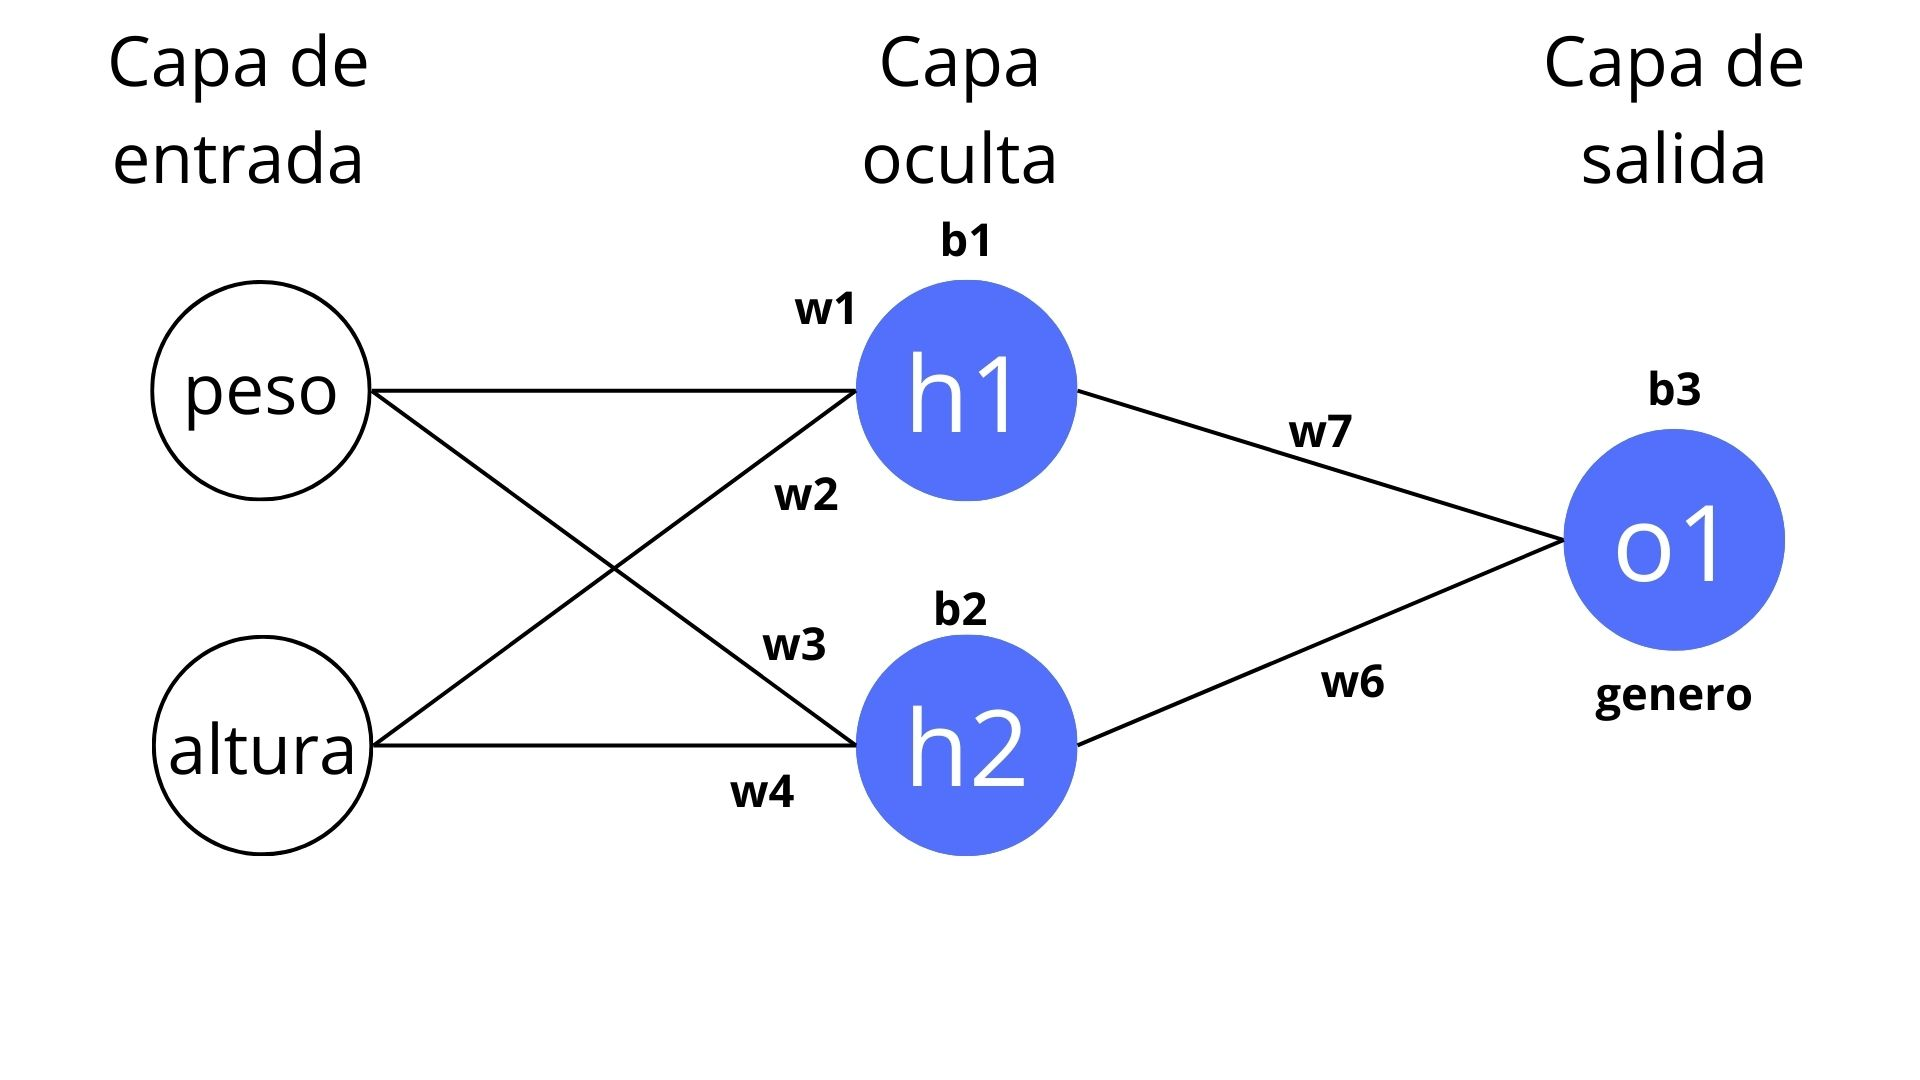

Representaremos *Hombre* con un 0 y *Mujer* con un 1. También cambiaremos los datos para que sean más fáciles de usar (ya sabes que esto lo podemos hacer con *dummies* y con *scallers*).


| Nombre | Peso(-135)    | Altura(-66) | Género |
|-------------------|-------------|---------------|--------------|
| Juan  | 25  | 6 | 0 |
| Alicia | -2 | -1 | 1 |
| Carlos | 17 | 4 | 0 |
| Mari  | -15 | -6 | 1 |

Antes de entrenar a nuestra red, primero necesitamos una forma de cuantificar qué tan *bien* lo está haciendo para que pueda intentar hacerlo *mejor*. Esto es la pérdida.

Usaremos la pérdida del error cuadrático medio (MSE), que seguro recordarás de sesiones previas.
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{verdadera} - y_{predecida})^2
$$

Donde:
- $n$ es el número de muestras (Alice, Bob, Charlie, Diana)
- $y$ representa la variable que se predice, que es *género*.
- $y_{verdadera}$ es el valor verdadero de la variable (la «respuesta correcta»). Por ejemplo, $y_{verdadera}$ para Alice sería 1 (Mujer).
- $y_{predecida}$ es el valor predicho de la variable. Se refiere a lo que sea que produzca nuestra red.

Digamos que nuestra red siempre genera 00; en otras palabras, está segura de que todos los humanos son hombres 🤔. ¿Cuál sería nuestra pérdida?


| Nombre | $y_{verdadera}$    | $y_{predecida}$ | $(y_{verdadera} - y_{predecida})^2$        |
|-------------------|-------------|---------------|--------------|
| Juan  | 1  | 0 | 1                |
| Alicia | 0 | 0 | 0                |
| Carlos | 0 | 0 | 0                |
| Mari  | 1 | 0 | 1                  |

$$
MSE = \frac{1}{4}(1+0+0+1) = 0.5
$$

Vamos a realizarlo con código:

In [ ]:
import numpy as np

def mse_loss(y_verdadera, y_predecida):
  # y_verdadera y y_predecida son arrays de numpy del mismo tamaño
  return ((y_verdadera - y_predecida) ** 2).mean()

y_verdadera = np.array([1, 0, 0, 1])
y_predecida = np.array([0, 0, 0, 0])

print(mse_loss(y_verdadera, y_predecida))

0.5


Ahora tenemos un objetivo claro: minimizar la pérdida de la red neuronal. Sabemos que podemos cambiar los pesos y sesgos de la red para influir en sus predicciones, pero ¿cómo lo hacemos de manera que disminuya la pérdida?

Para simplificar, supongamos que solo tenemos a *Alice* en nuestro conjunto de datos:

| Nombre | Peso(-135)    | Altura(-66) | Género |
|-------------------|-------------|---------------|--------------|
| Alicia | -2 | -1 | 1 |

Entonces, la pérdida del error cuadrático medio es solo el error cuadrático de *Alice*:
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{verdadera} - y_{predecida})^2
$$
$$
= (y_{verdadera} - y_{predecida})^2
$$
$$
= (1 - y_{predecida})^2
$$

Otra forma de pensar en la pérdida es como una función de pesos y sesgos. Etiquetemos cada peso y sesgo en nuestra red:

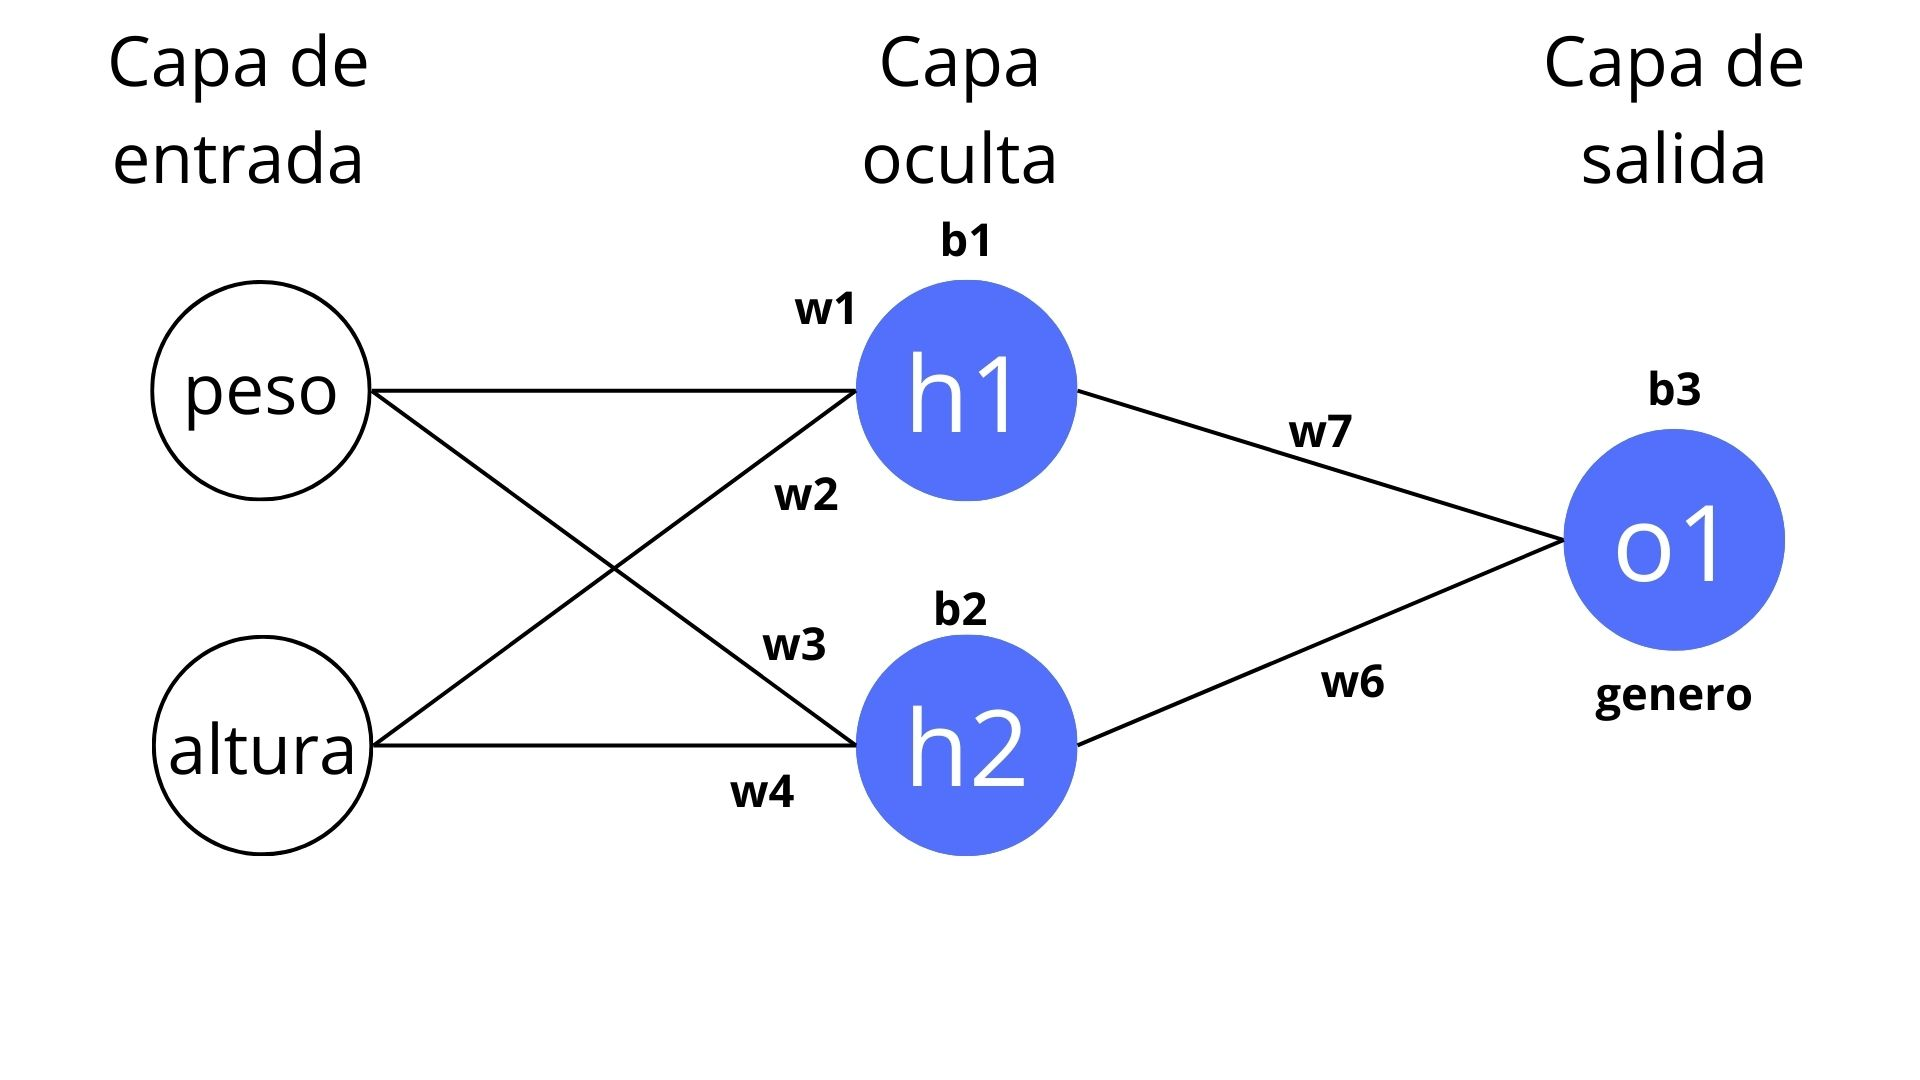

Entonces, podemos escribir la pérdida como una función multivariable:
$$
L(w_{1},w_{2},w_{3},w_{4},w_{5},w_{6},b_{1},b_{2},b_{3})
$$

Este sistema de cálculo de derivadas parciales trabajando hacia atrás se conoce como ***backpropagation*** o *backprop*.

Imagina que quieres modificar $w_{1}$​. ¿Cómo cambiaría la pérdida $L$ si cambiamos $w_{1}$​? Esa es una pregunta para la derivada parcial, cuya fórmula descompuesta es la siguiente:
$$
\frac{\vartheta L}{\vartheta w_{1}} = \frac{\vartheta L}{\vartheta w_{predecida}} * \frac{\vartheta w_{predecida}}{\vartheta h_{1}} * \frac{\vartheta h_{1}}{\vartheta w_{1}}
$$

Ahora sigamos fingiendo que solo *Alice* está en nuestro conjunto de datos:

| Nombre | Peso(-135)    | Altura(-66) | Género |
|-------------------|-------------|---------------|--------------|
| Alicia | -2 | -1 | 1 |

Inicializamos todos los pesos a 1 y todos los sesgos a 0. Si hacemos un paso de avance a través de la red, obtenemos:
$$
h_{1} = f(w_{1}x_{1} + w_{2}x_{2} + b_{1})
$$
$$
= f(-2 + -1 + 0)
$$
$$
= 0.0474
$$

$$
h_{2} = f(w_{3}x_{1} + w_{4}x_{2} + b_{2}) = 0.0474
$$
$$
= f(0.0474 + 0.0474 + 0)
$$
$$
= 0.524
$$

La red genera $y_{predecida} ​=0.524$, lo que no favorece mucho a *Hombre* (0) o a *Mujer* (1). Calculemos ahora $\frac{\vartheta L}{\vartheta w_{1}}$:

$$
\frac{\vartheta L}{\vartheta w_{1}} = \frac{\vartheta L}{\vartheta y_{predecida}} * \frac{\vartheta y_{predecida}}{\vartheta h_{1}} * \frac{\vartheta h_{1}}{\vartheta w_{1}}
$$
___
$$
\frac{\vartheta w_{predecida}}{\vartheta h_{1}} = -2(1 - y_{predecida})
$$
$$
= -2(1-0.524)
$$
$$
= -0.952
$$

___

$$
\frac{\vartheta y_{predecida}}{\vartheta h_{1}} = w_{5} * f'(w_{5}h_{1} + w_{6}h_{2} + b_{3})
$$
$$
= 1 * f'(0.0474 + 0.0474 + 0)$$
$$
= f(0.0948) * (1 - f(0.0948))
$$
$$
= 0.249
$$
___
$$
\frac{\vartheta h_{1}}{\vartheta w_{1}} = x_{1} * f'(w_{1}h_{1} + w_{2}h_{2} + b_{1})
$$
$$
= -2 * f'(-2 + -1 + 0)
$$
$$
= -2 * f(-3) * (1 - f(-3))
$$
$$
= -0.0904
$$
___
$$
\frac{\vartheta L}{\vartheta w_{1}} = -0.952*0.249*-0.0904
$$
$$
= 0.0214
$$

Esto nos dice que si aumentáramos $w_{1}$​, $L$, aumentaría un poquito como resultado.



¡Ya tenemos todas las herramientas que necesitamos para entrenar una red neuronal! Usaremos un algoritmo de optimización llamado **descenso de gradiente estocástico (SGD)**, que nos dice cómo cambiar nuestros pesos y sesgos para minimizar la pérdida. Básicamente es solo esta ecuación de actualización:
$$
w_{1} \leftarrow w_{1} - n \frac{\vartheta L}{\vartheta w_{1}}
$$

Donde η es una constante llamada tasa de aprendizaje, que controla qué tan rápido entrenamos. Todo lo que estamos haciendo es restar η ∂ w 1/​∂ L​ de w 1​:

- Si ∂ L/ ∂ w 1​ es positivo, w 1​ disminuirá, lo que hace que *L* disminuya.
- Si ∂ L/ ∂ w 1​​ es negativo, w 1​ aumentará, lo que hace que *L* disminuya.

Si hacemos esto para cada peso y sesgo en la red, la pérdida disminuirá lentamente y nuestra red mejorará.

Nuestro proceso de entrenamiento será así:

1. Elige una muestra de nuestro conjunto de datos. Esto lo convertirá en un descenso de gradiente estocástico: solo operamos en una muestra a la vez.
2. Calcula todas las derivadas parciales de pérdida con respecto a pesos o sesgos (por ejemplo: ∂ L/ ∂ w 1​, ∂ L ​/∂ w 2​, etc.).
3. Utiliza la ecuación de actualización para actualizar cada ponderación y sesgo.
4. Vuelve al paso 1.

Vamos a realizarlo con código:

In [ ]:

import numpy as np

def sigmoid(x):
  # Función de activación sigmoide: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivada de sigmoide: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_verdadera and y_verdadera son arrays con el nismo tamaño
  return ((y_true - y_pred) ** 2).mean()

class MiRedNeuronal:
  '''
    Una red neuronal con:
    - 2 entradas
    - 1 capa oculta con 2 neuronas (h1, h2)
    - Una capa de salida 1 neurona (o1)
  '''
  def __init__(self):
    # Pesos
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Sesgos
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x es un array de numpy de 2 elementos
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - La data es un array de numpy (n x 2) n =  n = # of muestras en el dataset
    - todo_y_verdaderas es un array de numpy con n elementos que son la data
    '''
    learn_rate = 0.1
    epochs = 1000 # número de veces para recorrer todo el conjunto de datos

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # Haz un feedforward (necesitaremos estos valores más adelante)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # Cálculo de las derivadas parciales.
        # d_L_d_w1 representa "parcial L / parcial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neurona o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neurona h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neurona h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # Actualización de pesos y sesgos
        # Neurona h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neurona h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neurona o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # Calcular la pérdida total al final de cada epoch o época
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d perdida: %.3f" % (epoch, loss))

# Definimos el dataset
data = np.array([
  [-2, -1],  # Alicia
  [25, 6],   # Juan
  [17, 4],   # Carlos
  [-15, -6], # Mari
])
all_y_trues = np.array([
  1, # Alicia
  0, # Juan
  0, # Carlos
  1, # Mari
])

# Entrenamos nuestra red neuronal
network = MiRedNeuronal()
network.train(data, all_y_trues)

data = np.array([
  [-2, -1],
  [25, 6],
  [17, 4],
  [-15, -6],
])

all_y_trues = np.array([
  1,
  0,
  0,
  1,
])

Epoch 0 perdida: 0.395
Epoch 10 perdida: 0.249
Epoch 20 perdida: 0.113
Epoch 30 perdida: 0.076
Epoch 40 perdida: 0.061
Epoch 50 perdida: 0.052
Epoch 60 perdida: 0.044
Epoch 70 perdida: 0.039
Epoch 80 perdida: 0.034
Epoch 90 perdida: 0.031
Epoch 100 perdida: 0.028
Epoch 110 perdida: 0.025
Epoch 120 perdida: 0.023
Epoch 130 perdida: 0.021
Epoch 140 perdida: 0.020
Epoch 150 perdida: 0.018
Epoch 160 perdida: 0.017
Epoch 170 perdida: 0.016
Epoch 180 perdida: 0.015
Epoch 190 perdida: 0.014
Epoch 200 perdida: 0.013
Epoch 210 perdida: 0.013
Epoch 220 perdida: 0.012
Epoch 230 perdida: 0.011
Epoch 240 perdida: 0.011
Epoch 250 perdida: 0.010
Epoch 260 perdida: 0.010
Epoch 270 perdida: 0.010
Epoch 280 perdida: 0.009
Epoch 290 perdida: 0.009
Epoch 300 perdida: 0.009
Epoch 310 perdida: 0.008
Epoch 320 perdida: 0.008
Epoch 330 perdida: 0.008
Epoch 340 perdida: 0.007
Epoch 350 perdida: 0.007
Epoch 360 perdida: 0.007
Epoch 370 perdida: 0.007
Epoch 380 perdida: 0.007
Epoch 390 perdida: 0.006
Epoch 400 p

Observa que la pérdida disminuye de manera constante a medida que la red aprende.

Ahora podemos usar la red para predecir géneros:



In [ ]:
Angela = np.array([-7, -3]) # 128 libras, 63 pulgadas
Daniel = np.array([20, 2])  # 155 libras, 68 pulgadas
print("Angela: %.3f" % network.feedforward(Angela)) # 0.947 (aprox) - Mujer
print("Daniel: %.3f" % network.feedforward(Daniel)) # 0.014 (aprox) - Hombre

Angela: 0.965
Daniel: 0.055


# Ponte a prueba

Usa el código de la red neuronal anterior y:
- Predice el género de tres personas.
- Modifica el `learn_rate` y el número de repeticiones observando los resultados.
- Entrena la red neuronal con otro *dataset*.
- Grafica las pérdidas.

Ahora que sabes cómo hacer una red neuronal de forma artesanal, usaremos diferentes bibliotecas de *Deep Learning* para realizar el entrenamiento, porque hacer esto para cada caso será muy complicado.

# PyTorch

PyTorch es una biblioteca Python de código abierto para el aprendizaje profundo, desarrollada y mantenida por Facebook. El proyecto comenzó en 2016 y rápidamente se convirtió en un marco popular entre desarrolladores e investigadores.

Con PyTorch vamos a entrenar modelos de ML. Cada modelo tiene un ciclo de vida, y este conocimiento muy simple proporciona la columna vertebral tanto para modelar un conjunto de datos como para comprender la API de PyTorch.

Los cinco pasos en el ciclo de vida son los siguientes:

1. Preparar los datos
2. Definir el modelo
3. Capacitar al modelo
4. Evaluar el modelo
5. Hacer predicciones

## Paso 1: Preparar los datos

PyTorch proporciona la clase *dataset* que podemos ampliar y personalizar para cargar nuestro conjunto de datos.

Por ejemplo, cargamos un archivo, luego podemos anular la función `__len__()`, que se puede usar para obtener la longitud del conjunto de datos (número de filas o muestras), y la función `__getitem__()`, que se usa para obtener una muestra específica por índice.

Al cargar nuestro *dataset*, también podemos realizar las transformaciones necesarias, como escalar o reducir dimensiones.

Primero vamos a cargar las bibliotecas necesarias:


In [ ]:
from numpy import vstack
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import BCELoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_

Después pasamos a la preparación de los datos

In [ ]:
# Definición de nuestro dataset
class CSVDataset(Dataset):
    # Cargamos el dataset
    def __init__(self, path):
        # Cargamos el archivo CSV como un dataframe
        df = read_csv(path, header=None)
        # Guardamos los valores de entrada y los de salida
        self.X = df.values[:, :-1]
        self.y = df.values[:, -1]
        # Nos aseguramos de que la data de entrada sea flotante
        self.X = self.X.astype('float32')
        # Etiquetamos el objetivo de codificación y asegúrese de que los valores sean flotantes
        self.y = LabelEncoder().fit_transform(self.y)
        self.y = self.y.astype('float32')
        self.y = self.y.reshape((len(self.y), 1))

    # Sacamos el número de filas en el dataset
    def __len__(self):
        return len(self.X)

    # Obtenemos una fila en un índice
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    # Obtenemos los índices para entrenar y probar filas
    def get_splits(self, n_test=0.33):
        # Determinamos los tamaños
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # Calculamos los splits
        return random_split(self, [train_size, test_size])

# Preparamos el dataset
def prepare_data(path):
    # Cargamos el dataset
    dataset = CSVDataset(path)
    # Calculamos los splits
    train, test = dataset.get_splits()
    # Preparamos cargadores de datos
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl

## Paso 2: Definición del modelo

El siguiente paso es definir un modelo.

El método para definir un modelo en PyTorch implica definir una clase que extienda de la clase `Module`.

El constructor de su clase define las capas del modelo, y la función `forward()` es la anulación que define cómo reenviar la entrada de propagación a través de las capas definidas del modelo.

Hay muchas capas disponibles, como Linear para capas totalmente conectadas, `Conv2d` para capas convolucionales y `MaxPool2d` para capas de agrupación.

Las funciones de activación también se pueden definir como capas, como `ReLU` , `Softmax` y `Sigmoid`.

Vamos a hacerlo con código:


In [ ]:
# Definición del modelo
class MLP(Module):
    # Definimos los elementos del modelo
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # Entrada a la primera capa oculta
        self.hidden1 = Linear(n_inputs, 10)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        # Segunda capa oculta
        self.hidden2 = Linear(10, 8)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        # Tercera capa oculta y salida
        self.hidden3 = Linear(8, 1)
        xavier_uniform_(self.hidden3.weight)
        self.act3 = Sigmoid()

    # Entrada de alimentación hacia delante
    def forward(self, X):
        # Entrada a la primera capa oculta
        X = self.hidden1(X)
        X = self.act1(X)
        # Segunda capa oculta
        X = self.hidden2(X)
        X = self.act2(X)
        # Tercera capa oculta y salida
        X = self.hidden3(X)
        X = self.act3(X)
        return X

## Paso 3. Entrenamos el modelo

El proceso de entrenamiento requiere que se defina una función de pérdida y un algoritmo de optimización.

Estas son algunas funciones de pérdida comunes:

- **BCELoss**: pérdida de entropía cruzada binaria para la clasificación binaria.
- **CrossEntropyLoss**: pérdida de entropía cruzada categórica para la clasificación multiclase.
- **MSELoss**: pérdida cuadrática media para la regresión.

El descenso de gradiente estocástico se utiliza para la optimización, y el algoritmo estándar lo proporciona la clase **SGD**, aunque hay otras versiones del algoritmo disponibles, como **Adam**.

In [ ]:
# Entrenamos el modelo
def train_model(train_dl, model):
    # Definimos la optimización
    criterion = BCELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    # Pasamos por las diferentes epocas o repeticiones
    for epoch in range(100):
        # Enumeramos los mini lotes
        for i, (inputs, targets) in enumerate(train_dl):
            # Borramos los gradientes
            optimizer.zero_grad()
            # Calculamos la salida del modelo
            yhat = model(inputs)
            # Calculamos la pérdida
            loss = criterion(yhat, targets)
            loss.backward()
            # Actualizamos los pesos del modelo
            optimizer.step()

# Paso 4: Evaluación del modelo

Una vez que se entrena el modelo, se puede evaluar en el conjunto de datos de prueba.

Esto se puede lograr utilizando `DataLoader` para el conjunto de datos de prueba y recopilando las predicciones para el conjunto de prueba, luego comparando las predicciones con los valores esperados del conjunto de prueba y calculando una métrica de rendimiento.

In [ ]:
# Evaluación del modelo
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # Evaluamos el modelo con el dataset de prueba
        yhat = model(inputs)
        # Regresamos un numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # Redondeamos a valores de clases
        yhat = yhat.round()
        # Guardamos los valores
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # Calculamos la precisión
    acc = accuracy_score(actuals, predictions)
    return acc

# Paso 5: Hacemos predicciones

Un modelo de entrenamiento se puede utilizar para hacer una predicción sobre nuevos datos.


Esto requiere envolver los datos en una estructura de datos PyTorch Tensor.

Un Tensor es solo la versión PyTorch de una matriz NumPy para almacenar datos. También nos permite realizar las tareas de diferenciación automática en el gráfico del modelo, como llamar hacia atrás al entrenar el modelo.

La predicción también será un Tensor, aunque puede recuperar la matriz NumPy separando el Tensor del gráfico de diferenciación automática y llamando a la función NumPy.

In [ ]:
# Hacemos una predicción de clase para una fila de datos
def predict(row, model):
    # Convertimos la fila en datos
    row = Tensor([row])
    # Hacemos la predicción
    yhat = model(row)
    # Devolvemos un array de numpy
    yhat = yhat.detach().numpy()
    return yhat

Ahora solo falta activar todo, es decir, mandar datos a `prepare_data()`, entrenar el modelo y predecir.

Para hacerlo, usamos el siguiente *dataset*: https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv

Este *dataset* tiene datos de la ionosfera, recabados por la universidad Johns Hopkins. Si quieres más información, puedes consultar [-> ESTE LINK <-](https://www.openml.org/search?type=data&sort=runs&id=59&status=active)

In [ ]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
train_dl, test_dl = prepare_data(path)
print(len(train_dl.dataset), len(test_dl.dataset))
# Definimos la red neuronal
model = MLP(34)
# Entrenamos el modelo
train_model(train_dl, model)
# Evaluamos el modelo
acc = evaluate_model(test_dl, model)
print('Precisión: %.3f' % acc)
# Hacemos una predicción
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = predict(row, model)
print('Predecido: %.3f (class=%d)' % (yhat, yhat.round()))

235 116
Precisión: 0.888
Predecido: 1.000 (class=1)


Este modelo, que nos puede ayudar a predecir disturbios en la ionosfera para estudiar relampagos u otras alteraciones nos predijo la clase con un 96% de presición usando PyTorch. Ahora pasemos a otro método, con Tensorflow.



# TensorFlow - Keras

TensorFlow es una plataforma de código abierto para *Machine Learning* y una biblioteca matemática simbólica que se utiliza para aplicaciones de aprendizaje automático.

Por otro lado, Keras es una biblioteca de *Machine Learning* de código abierto en Python. Cabe destacar que actualmente Keras pertenece a la suite de TensorFlow.

Un módelo entrenado con Keras tiene los mismos cinco pasos que PyTorch:

1. Definir el modelo
2. Compilar el modelo
3. Entrenar el modelo
4. Evaluar el modelo
5. Hacer predicciones

Ahora usaremos el mismo *dataset* para que puedas ver una comparativa entre ambos métodos. Te proporcionamos de nuevo el *link* del *dataset*: https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv

Además, usaremos la API de modelo secuencial, que es la más simple y recomendada para comenzar.

Se denomina secuencial porque implica definir una clase `Sequential` y agregar capas al modelo una por una de manera lineal, desde la entrada hasta la salida.

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Cargamos el dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
df = read_csv(path, header=None)
# Dividimos las columnas de entrada y salida
X, y = df.values[:, :-1], df.values[:, -1]
# Nos aseguramos de que todos los datos sean valores flotantes
X = X.astype('float32')
# Cambiamos los strings a integers
y = LabelEncoder().fit_transform(y)
# Dividimos los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# Determinamos el número de caracteristicas de entrada.
n_features = X_train.shape[1]

# Definimos el modelo
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# Compilamos el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# Evaluamos el modelo
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Presición Test: %.3f' % acc)

# Hacemos predicciones
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model.predict([row])
print('Predecido: %.3f' % yhat)

(235, 34) (116, 34) (235,) (116,)
Presición Test: 0.922
1/1 [==============================] - 0s 101ms/step
Predecido: 0.999


En este caso podemos ver que el modelo logró una precisión de clasificación de alrededor del 94 % y luego predijo una probabilidad de 0.9 de que una fila de datos pertenezca a la clase 1.

Cabe destacar que los resultados de todos estos modelos pueden variar, dada la naturaleza estocástica del algoritmo, procedimiento de evaluación o diferencias en la precisión numérica. Considera ejecutar el ejemplo varias veces y comparar el resultado promedio.



# Clasificación multiclase

Por último, vamos a llevar nuestro aprendizaje un poco más allá.

Usaremos el conjunto de datos de clasificación multiclase de flores de iris para demostrar un MLP para la clasificación multiclase.

Puedes descargar el *dataset* aquí -> https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv

Y tener más inormacion de él aquí -> https://www.kaggle.com/datasets/uciml/iris

Este problema implica predecir la especie de flor de iris dadas las medidas de la flor.

Dado que es una clasificación multiclase, el modelo debe tener un nodo para cada clase en la capa de salida y usar la función de activación `softmax`. La función de pérdida es ` sparse_categorical_crossentropy`, apropiada para etiquetas de clase codificadas con enteros (por ejemplo: 0 para una clase, 1 para la siguiente clase, etc.).








In [ ]:
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Cargamos el dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
df = read_csv(path, header=None)

# Dividimos las columnas en entradas y salida
X, y = df.values[:, :-1], df.values[:, -1]
# Nos aseguramos de que todos los datos sean valores flotantes
X = X.astype('float32')
# Cambiamos los strings a integers
y = LabelEncoder().fit_transform(y)
# Dividimos los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# Determinamos el número de caracteristicas de entrada.
n_features = X_train.shape[1]


# Definimos el modelo
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))

# Compilamos el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# Evaluamos el modelo
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Presición Test: %.3f' % acc)

# Hacemos una predicción
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])
print('Predecido: %s (class=%d)' % (yhat, argmax(yhat)))

(100, 4) (50, 4) (100,) (50,)
Presición Test: 0.780
1/1 [==============================] - 0s 85ms/step
Predecido: [[0.4727083  0.43732834 0.08996332]] (class=0)


En este caso, podemos ver que el modelo logró una precisión de clasificación de alrededor de 98 % y luego predijo una probabilidad de una fila de datos pertenecientes a cada clase, aunque la clase 0 tiene la probabilidad más alta.


#### **Ponte a prueba 2**

Usaremos el conjunto de datos de clasificación multiclase de vinos para demostrar cómo implementar un MLP para clasificación multiclase.

El objetivo es predecir el origen de un vino basado en sus características químicas.

**Nota:** Podemos tomar como referencia el ejercicio con el conjunto de datos Iris del notebook semana 18.

**Código base:**

In [ ]:
from sklearn.datasets import load_wine

# Cargamos el conjunto de datos de vinos
data = load_wine()
X, y = data.data, data.target

# Reto semanal

Usa el *dataset* de casas en California con el código base a continuación.

Realiza lo siguiente:
- Un modelo de MLP de regresión con Keras (ya que son datos para regresión).
- Genera tres predicciones con datos aleatorios.
- Calcula el MSE y RMSE.
- Analiza los resultados.


**Código base**

In [ ]:
from sklearn.datasets import fetch_california_housing
# 1. Cargar el conjunto de datos
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Felicidades

Ahora sabes hacer redes neuronales *feedforward* de manera artesanal y usando una API.

Es hora de ponerte a prueba con el reto de la semana.